# Hierarchical Clustering
2. Apply K-Means clustering on below dataset

In [27]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#libarry for feature scaling
from sklearn.preprocessing import StandardScaler

# Their are two types of clutering - 1) AgglomerativeClustering 2) DIvisive
from sklearn.cluster import AgglomerativeClustering

# to draw dendrogram
import scipy.cluster.hierarchy as sch

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week 12/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [3]:
# read the large csv file with specified chunksize 
df = pd.read_csv ("USCensus1990.data.txt",delimiter=",", sep='\t', iterator=True, chunksize=10000)

In [4]:
# convert textfile format to pandas dataframe
dataset = pd.concat(df, ignore_index=True)

In [5]:
dataset.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [6]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 2458285 rows and 69 Columns


In [7]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
caseid       int64
dAge         int64
dAncstry1    int64
dAncstry2    int64
iAvail       int64
iCitizen     int64
iClass       int64
dDepart      int64
iDisabl1     int64
iDisabl2     int64
iEnglish     int64
iFeb55       int64
iFertil      int64
dHispanic    int64
dHour89      int64
dHours       int64
iImmigr      int64
dIncome1     int64
dIncome2     int64
dIncome3     int64
dIncome4     int64
dIncome5     int64
dIncome6     int64
dIncome7     int64
dIncome8     int64
dIndustry    int64
iKorean      int64
iLang1       int64
iLooking     int64
iMarital     int64
iMay75880    int64
iMeans       int64
iMilitary    int64
iMobility    int64
iMobillim    int64
dOccup       int64
iOthrserv    int64
iPerscare    int64
dPOB         int64
dPoverty     int64
dPwgt1       int64
iRagechld    int64
dRearning    int64
iRelat1      int64
iRelat2      int64
iRemplpar    int64
iRiders      

In [9]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

caseid       0
dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
iCitizen     0
iClass       0
dDepart      0
iDisabl1     0
iDisabl2     0
iEnglish     0
iFeb55       0
iFertil      0
dHispanic    0
dHour89      0
dHours       0
iImmigr      0
dIncome1     0
dIncome2     0
dIncome3     0
dIncome4     0
dIncome5     0
dIncome6     0
dIncome7     0
dIncome8     0
dIndustry    0
iKorean      0
iLang1       0
iLooking     0
iMarital     0
            ..
dPoverty     0
dPwgt1       0
iRagechld    0
dRearning    0
iRelat1      0
iRelat2      0
iRemplpar    0
iRiders      0
iRlabor      0
iRownchld    0
dRpincome    0
iRPOB        0
iRrelchld    0
iRspouse     0
iRvetserv    0
iSchool      0
iSept80      0
iSex         0
iSubfam1     0
iSubfam2     0
iTmpabsnt    0
dTravtime    0
iVietnam     0
dWeek89      0
iWork89      0
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 69, dtype: int64

In [10]:
# check for duplicate values
dataset.duplicated().sum()

0

In [11]:
#Display heatmap to show correlation between diff variables
corr = dataset.corr()
corr

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
caseid,1.000000,-0.000125,-0.000059,-0.000895,-0.001612,-0.000569,0.000610,-0.000233,-0.000807,-0.000859,...,-0.000204,0.000089,0.000470,-0.000089,-0.000665,-0.000336,-0.001029,-0.000232,-0.000615,-0.000560
dAge,-0.000125,1.000000,-0.076637,-0.061483,-0.005739,0.051350,0.252755,0.156246,0.620457,0.643747,...,0.405227,0.174217,0.098044,0.243944,0.735720,0.577731,0.283091,0.514639,0.557327,0.275481
dAncstry1,-0.000059,-0.076637,1.000000,-0.119173,0.039066,0.053983,-0.036330,-0.044361,-0.055291,-0.056253,...,0.019342,-0.025534,-0.018818,-0.055391,-0.026825,0.010605,-0.041979,-0.097537,-0.000472,-0.038884
dAncstry2,-0.000895,-0.061483,-0.119173,1.000000,0.001920,-0.068623,-0.006352,-0.000304,-0.042538,-0.040904,...,-0.029906,-0.005367,0.006215,-0.003647,-0.057494,-0.034850,-0.015849,-0.013736,-0.053127,-0.004567
iAvail,-0.001612,-0.005739,0.039066,0.001920,1.000000,0.020889,0.051988,-0.142523,0.099289,0.110160,...,0.210562,-0.135781,0.007942,-0.000210,0.076547,0.214758,-0.019988,0.045438,0.055689,-0.001040
iCitizen,-0.000569,0.051350,0.053983,-0.068623,0.020889,1.000000,0.008522,0.035548,0.097313,0.093549,...,0.031521,0.057243,-0.038784,0.018001,0.087666,0.056806,-0.043211,0.005831,0.067212,-0.068485
iClass,0.000610,0.252755,-0.036330,-0.006352,0.051988,0.008522,1.000000,0.348512,0.407673,0.421967,...,-0.127495,0.307129,0.117935,0.458270,0.115992,0.077039,0.034255,0.420143,-0.162040,0.187037
dDepart,-0.000233,0.156246,-0.044361,-0.000304,-0.142523,0.035548,0.348512,1.000000,0.496866,0.500794,...,-0.480334,0.720737,0.102329,0.684801,0.032984,-0.136642,-0.073006,0.477069,-0.308155,0.073698
iDisabl1,-0.000807,0.620457,-0.055291,-0.042538,0.099289,0.097313,0.407673,0.496866,1.000000,0.977813,...,0.216304,0.473721,0.101597,0.595032,0.685995,0.512856,0.064008,0.740032,0.338016,0.160258
iDisabl2,-0.000859,0.643747,-0.056253,-0.040904,0.110160,0.093549,0.421967,0.500794,0.977813,1.000000,...,0.225430,0.477105,0.109256,0.601102,0.702196,0.527602,0.076109,0.750115,0.345586,0.175326


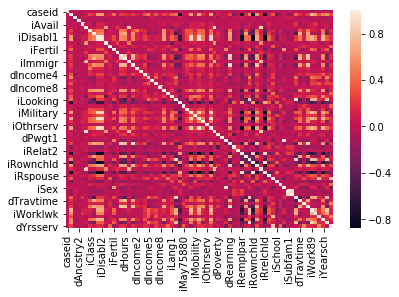

In [12]:
sb.heatmap(corr)

In [19]:
# x_data = dataset.iloc[:,[3,4]].values
x_data = dataset[:10000]
print("x_data :",x_data.shape)

x_data : (10000, 69)


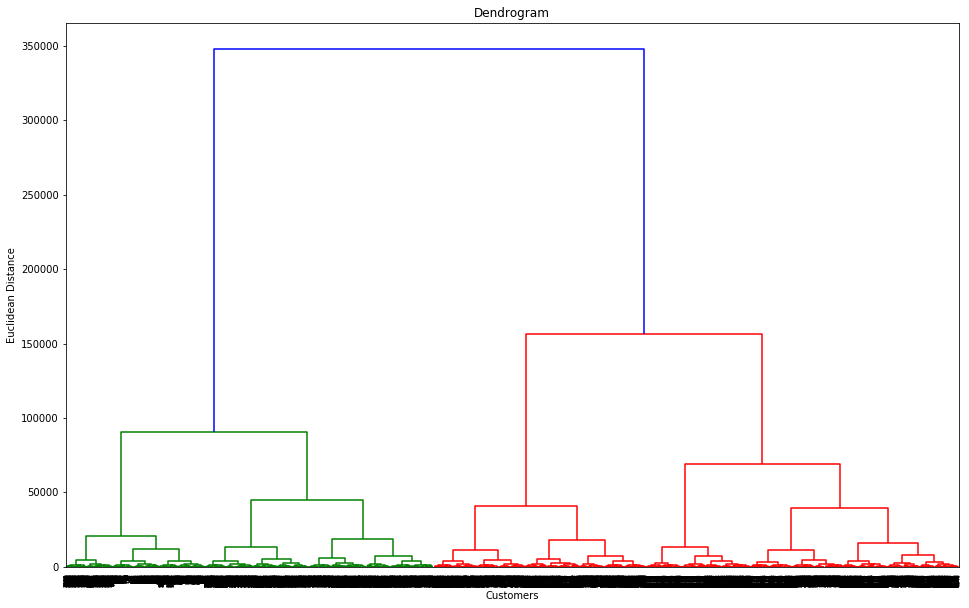

In [22]:
# Using the dendrogram to find the optimal number of clusters
def show_dendrogram(x_data):
    plt.figure(figsize = (16, 10))
    # ward method => Perform Ward’s linkage on a condensed distance matrix.
    dendrogram = sch.dendrogram(sch.linkage(x_data, method = 'ward'))
    plt.title("Dendrogram")
    plt.xlabel("Customers")
    plt.ylabel('Euclidean Distance')
    plt.show()
show_dendrogram(x_data)

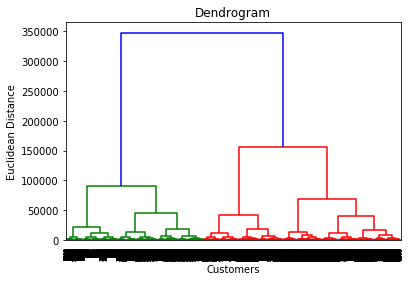

# Hierarchical_clustering Model

In [34]:
class Hierarchical_clustering():
    
    #fitting Hierarchical_clustering to the mall dataset
    def create_module(self,x):
        hcm = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage= 'ward')
        return hcm
    
    # cluster visualisation for Hierarchical clusterin
    def visualization_for_clusters_hc(self,x, y_kmeans, k_means_obj):
#         plt.figure(figsize = (16, 10))
        # to display graph properly eith grids
        plt.style.use('fivethirtyeight')
        # all classes
        plt.scatter(x[y_kmeans == 0 , 0], x[y_kmeans == 0 ,1], s = 100, c = 'olive', label = 'Cluster1')
        plt.scatter(x[y_kmeans == 1 , 0], x[y_kmeans == 1 ,1], s = 100, c = 'darkblue', label = 'Cluster2')
        plt.scatter(x[y_kmeans == 2 , 0], x[y_kmeans == 2 ,1], s = 100, c = 'rosybrown', label = 'Cluster3')
#         plt.scatter(x[y_kmeans == 3 , 0], x[y_kmeans == 3 ,1], s = 100, c = 'steelblue', label = 'Careless')
#         plt.scatter(x[y_kmeans == 4 , 0], x[y_kmeans == 4 ,1], s = 100, c = 'hotpink', label = 'Sensible')
        plt.title('cluster of client')
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.legend()
        plt.show()
    
def main():
    #class obj created
    obj  = Hierarchical_clustering()

    # create  Hierarchical_clustering module
    hcm = obj.create_module(x_data)
    print("\n Module created")

    # predict y with its class
    y_hcm = obj_util.prediction(x_data, hcm)
#     print("\n y_hcm:\n",y_hcm)
    
    # visualise customers at their class
#     obj.visualization_for_clusters_hc(x_data, y_hcm, hcm)
    
    # We cannot caculate accuracy here bcoz we dont have y_actual data
    
#     # Calculate accuracy  
#     adi, mib = obj_util.accuracy(y_train,y_kmeans)
    
#     print('\nPerformance by adjusted rand index:' , adi)
#     print('\nPerformance by Mutual information based score:'.mib)
    

if __name__ == '__main__':
    main()



 Module created
